<a href="https://colab.research.google.com/github/rulas99/thermal_anomaly_detection/blob/main/InferData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
import matplotlib.pyplot as plt

from pandas import read_csv

In [12]:
imagePath = read_csv('/content/drive/MyDrive/Inge/segment_sentinel2_hotspot/test_2.csv') # Test image
test_paths = list(imagePath.ori_path)
test_paths_a = list(imagePath.label_path)

In [3]:
modelPath = "/content/drive/MyDrive/Inge/segment_sentinel2_hotspot/Models_2/model_280.torch"  # Path to trained model
height=width=500

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
Net = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True) # Load net
Net.classifier[4] = torch.nn.Conv2d(256, 2, kernel_size=(1, 1), stride=(1, 1)) # Change final layer to 3 classes
Net = Net.to(device) # Set net to GPU or CPU

Net.load_state_dict(torch.load(modelPath)) # Load trained model
Net.eval() # Set to evaluation mode

In [5]:
transformImg=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)),tf.ToTensor(),])

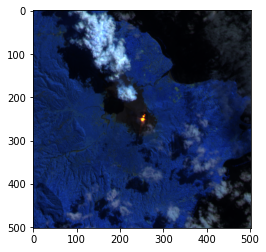

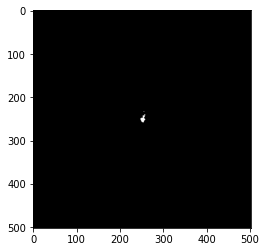

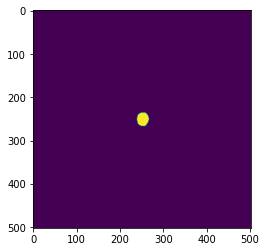

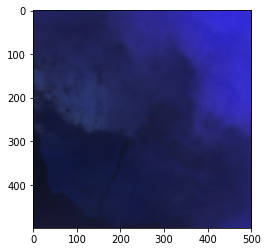

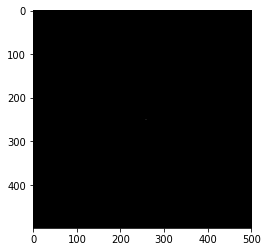

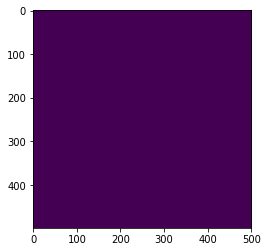

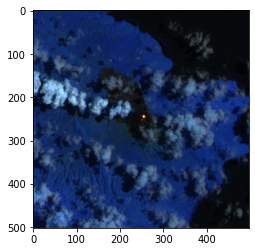

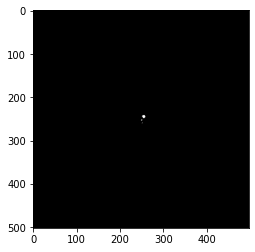

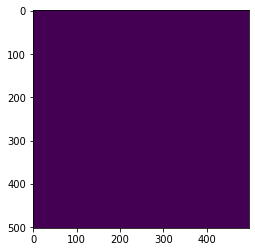

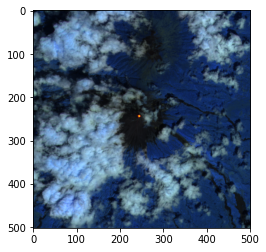

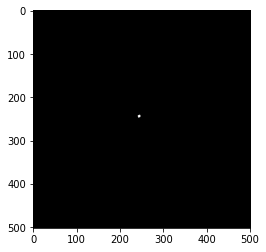

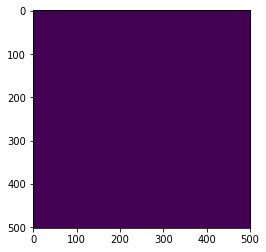

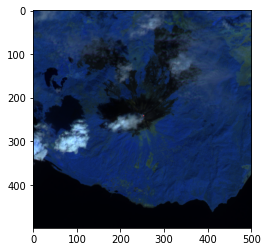

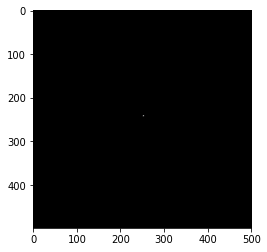

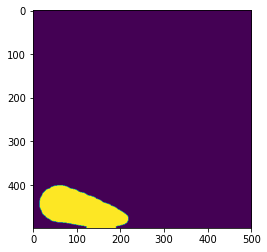

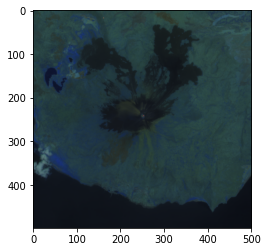

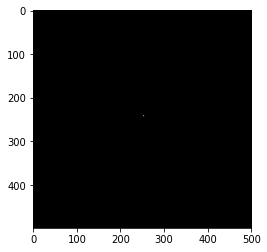

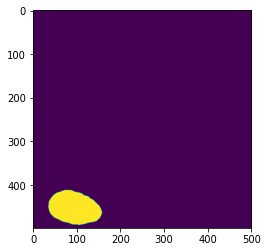

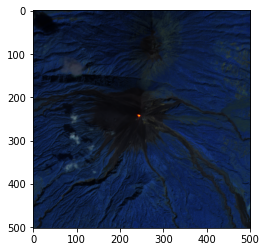

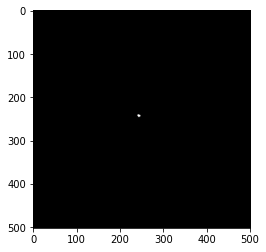

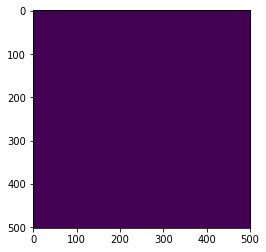

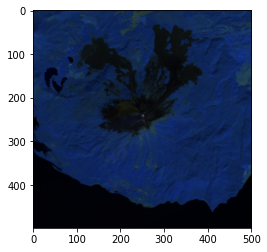

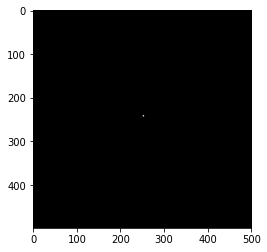

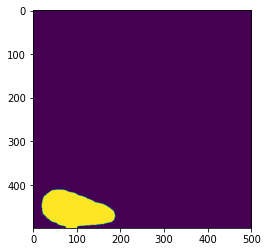

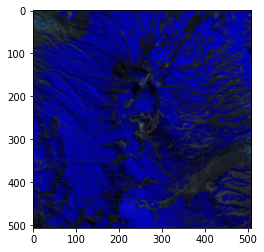

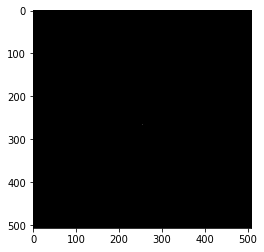

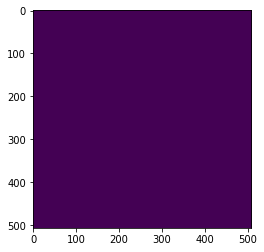

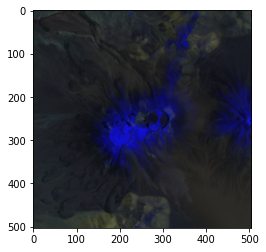

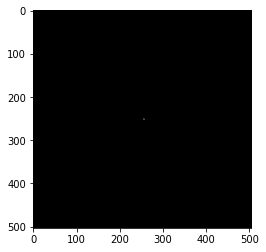

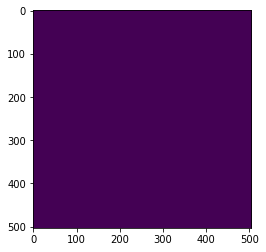

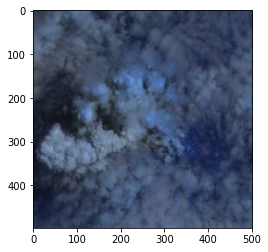

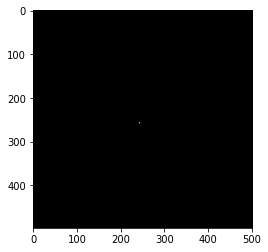

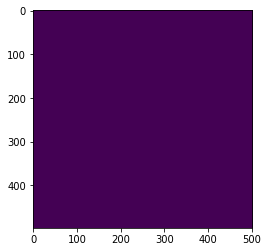

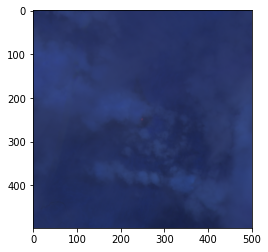

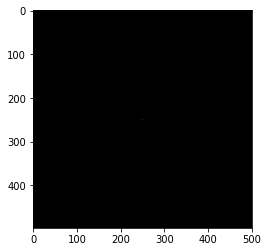

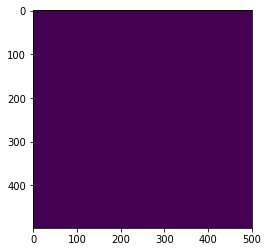

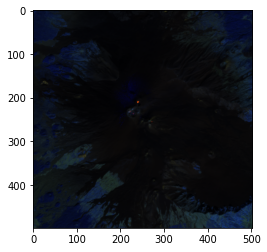

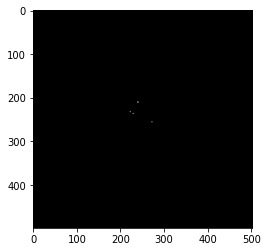

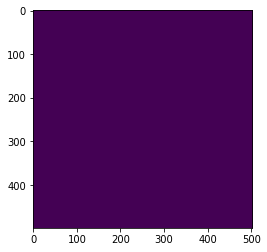

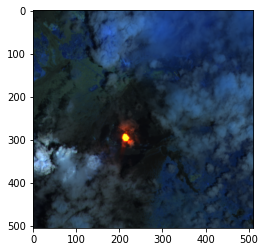

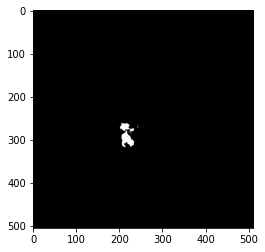

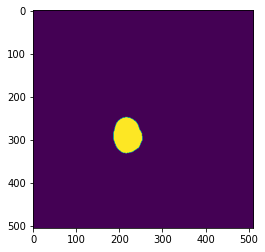

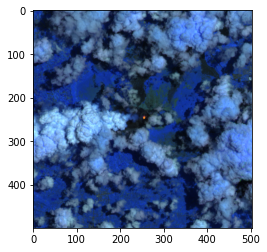

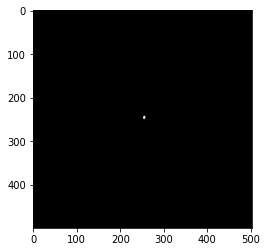

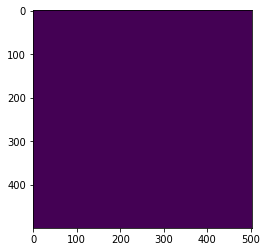

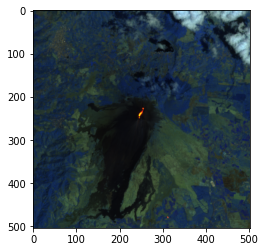

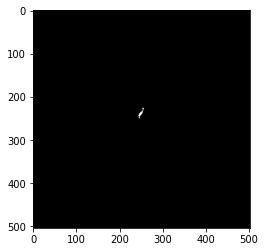

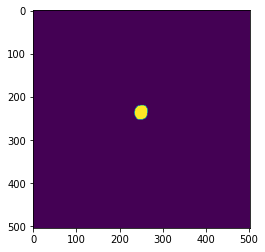

In [16]:
for i,j in zip(test_paths,test_paths_a):
  Img = cv2.imread(i) # load test image
  height_orgin , widh_orgin ,d = Img.shape # Get image original size 
  plt.imshow(Img[:,:,::-1])  # Show image
  plt.show()

  ann = cv2.imread(j) # load real label image
  plt.imshow(ann[:,:,::-1])
  plt.show()

  Img = transformImg(Img)  # Transform to pytorch
  Img = torch.autograd.Variable(Img, requires_grad=False).to(device).unsqueeze(0)
  with torch.no_grad():
      Prd = Net(Img)['out']  # Run net
  Prd = tf.Resize((height_orgin,widh_orgin))(Prd[0]) # Resize to origninal size
  seg = torch.argmax(Prd, 0).cpu().detach().numpy()  # Get  prediction classes
  plt.imshow(seg)  # display image
  plt.show()